In [1]:
import ModelViz

Create an instance of the ModelViz class, then use the functions to 
* `load_data / load_mfdata` to load data
* `load_grid` to load grid information
* `summarise_features` to sum sets of variables together
* `preprocess` to strip boundary and normalise 
* `make_tsds` to reshape data into a time series data set (tsds)
* `load_tsds` to load an existing time series data set from csv
* `train` to create a clustering model
* `load_model` to load an existing model
* `predict` to create predictions based on a tsds and model
* `get_cluster_info` to summarise predictions and calcuate mean/std dev for each cluster
* `plot_map` to plot the cluster output as a map
* `plot_ts` to plot time series for each cluster


## Train the model

Create an instace of ModelViz for the training data, read in that data and grid info

In [2]:
train = ModelViz.ModelViz()
train.load_mfdata('../../AMM7-MONTHLY-SURFACE/amm7_200[0-1]*.nc')
train.load_grid('../../AMM7-MONTHLY-SURFACE/domain_cfg.nc')

Combine variables and preprocess - stripping the boundary layers and normalising

In [3]:
sum_vars={'Phytoplankton': ['P1_c', 'P2_c', 'P3_c', 'P4_c'],
            'Zooplankton': ['Z4_c', 'Z5_c', 'Z6_c'],
            'DOM': ['R1_c', 'R2_c', 'R3_c'],
            'POM': ['R4_c', 'R6_c', 'R8_c']}
train.summarise_features(sum_vars)
train.preprocess()

Make the dataset by reshaping the data into the form needed 

In [4]:
train.make_tsds()

Fit the model (can take some time) and save

In [5]:
train.train(n_clusters=6, save=True, file_path='model.ks')

0.233 --> 0.224 --> 0.219 --> 0.217 --> 0.215 --> 0.214 --> 0.213 --> 0.212 --> 0.212 --> 0.210 --> 0.210 --> 0.209 --> 0.210 --> 


Produce a prediction of the training data

In [6]:
train.predict()

/users/modellers-new/dapa/mambaforge/envs/modelviz/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 61849 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


Create cluster dataset with the classification map, plus mean and std dev time series for each cluster

In [7]:
train.get_cluster_info(save=True, file_path='trained_clusters.nc')

Processing N1_p


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 10.59it/s]


Processing N3_n


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 11.11it/s]


Processing N4_n


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 11.27it/s]


Processing N5_s


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 11.11it/s]


Processing O2_o


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 11.06it/s]


Processing B1_c


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 11.33it/s]


Processing O3_c


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 11.25it/s]


Processing O3_TA


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 11.14it/s]


Processing O3_pH


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 11.09it/s]


Processing Phytoplankton


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.40it/s]


Processing Zooplankton


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  5.64it/s]


Processing DOM


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  5.27it/s]


Processing POM


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  5.69it/s]


Plot data

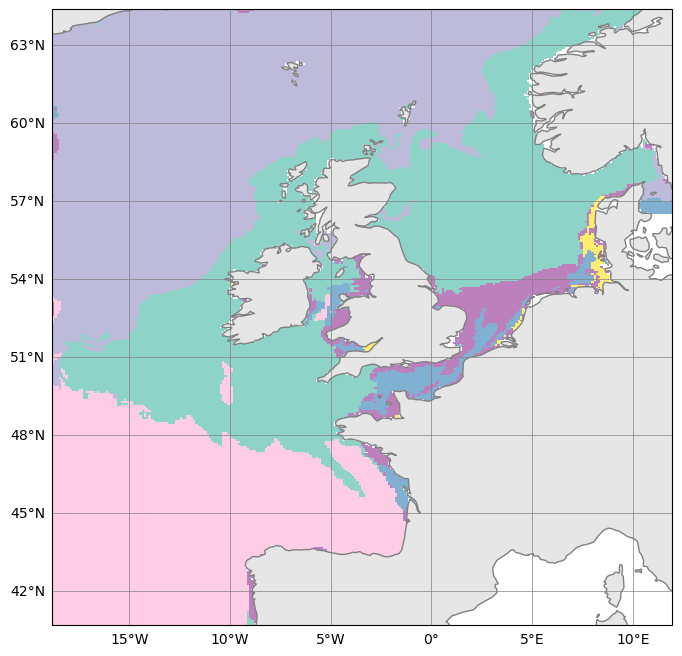

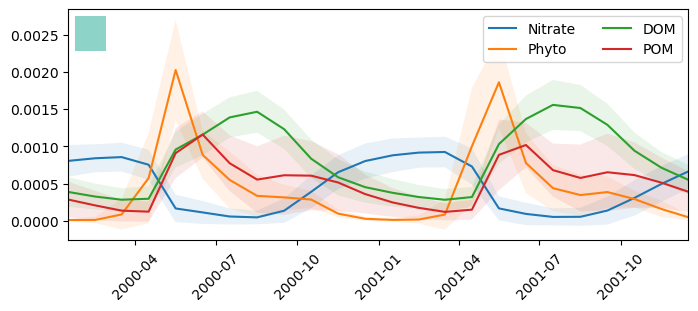

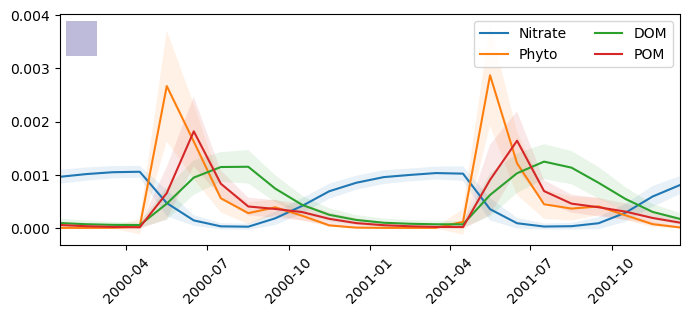

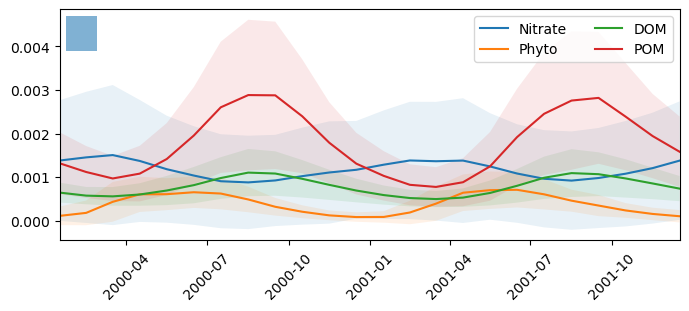

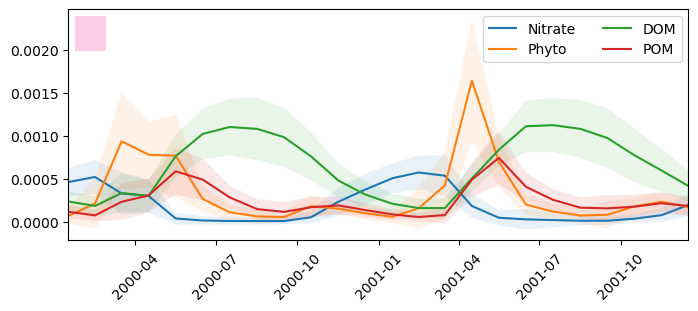

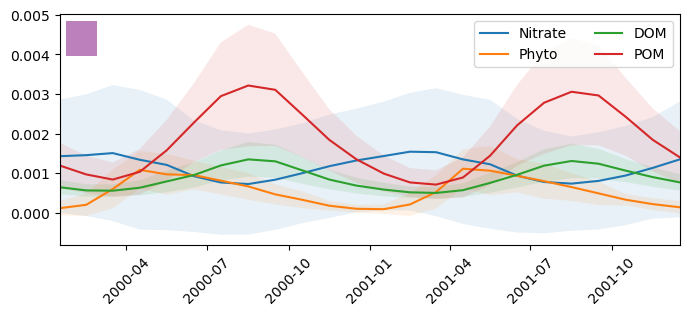

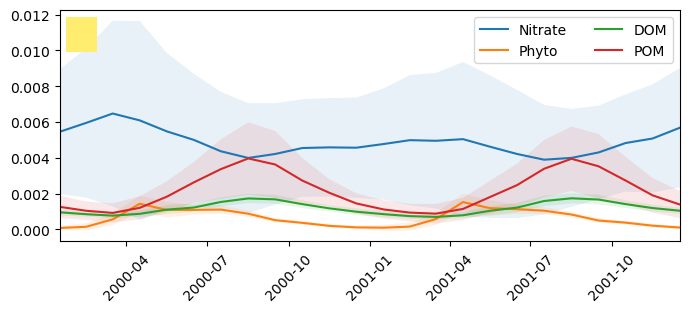

In [8]:
train.plot_map()
train.plot_ts()

## Form prediction using new data

Make a new instance, load our model, and dataset and grid infomation.

In [9]:
predict = ModelViz.ModelViz()

In [10]:
predict.load_model('model.ks')

In [11]:
predict.load_mfdata('../../AMM7-MONTHLY-SURFACE/amm7_200[2-3]*.nc')
predict.load_grid('../../AMM7-MONTHLY-SURFACE/domain_cfg.nc')

Summarise and preprocess data

In [12]:
predict.summarise_features(sum_vars)
predict.preprocess()

Create the tsds, produce the prediction and create cluster dataset

In [13]:
predict.make_tsds()
predict.predict()
predict.get_cluster_info(save=True, file_path='predicted_clusters.nc')

/users/modellers-new/dapa/mambaforge/envs/modelviz/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 61849 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


Processing N1_p


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 10.78it/s]


Processing N3_n


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 10.97it/s]


Processing N4_n


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 10.93it/s]


Processing N5_s


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 11.19it/s]


Processing O2_o


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 10.97it/s]


Processing B1_c


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 10.14it/s]


Processing O3_c


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 11.11it/s]


Processing O3_TA


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 10.89it/s]


Processing O3_pH


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 11.02it/s]


Processing Phytoplankton


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.34it/s]


Processing Zooplankton


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  5.54it/s]


Processing DOM


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  5.15it/s]


Processing POM


100%|█████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  5.63it/s]


Plot output

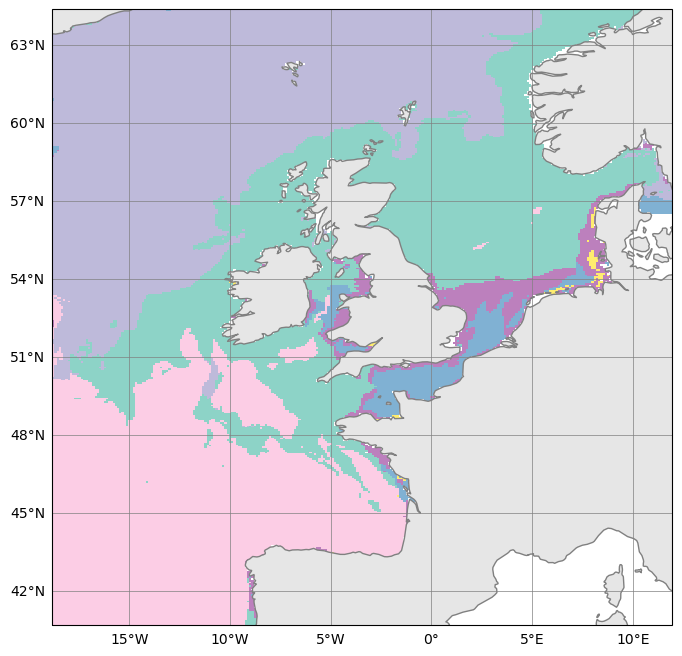

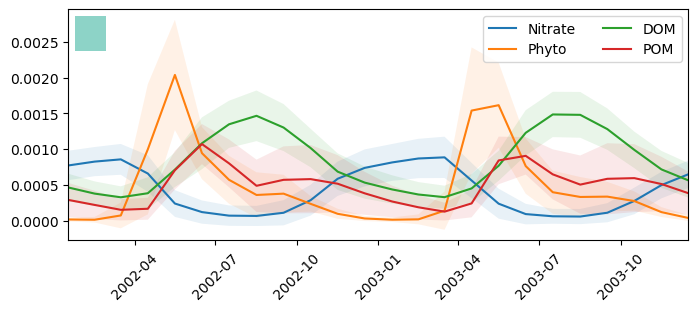

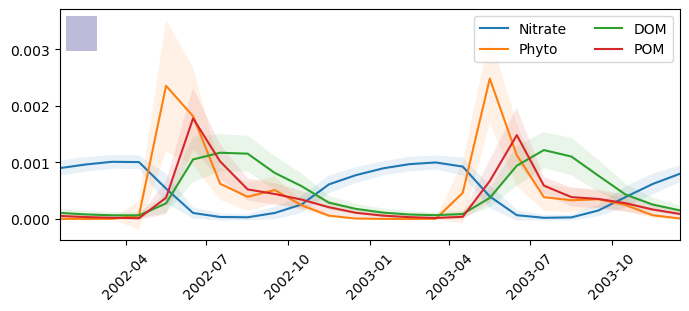

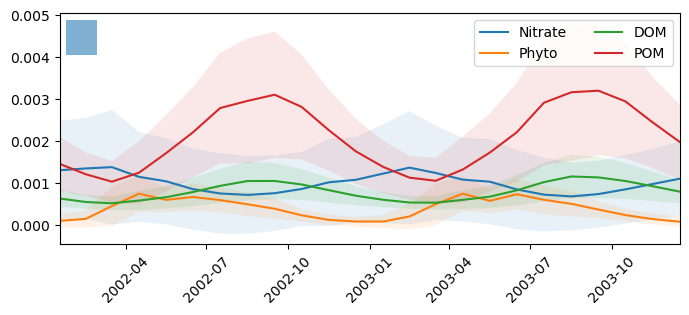

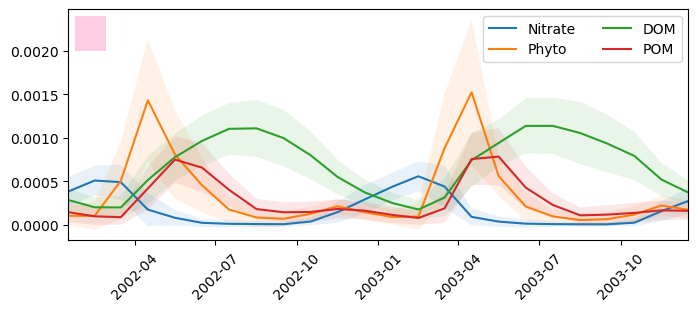

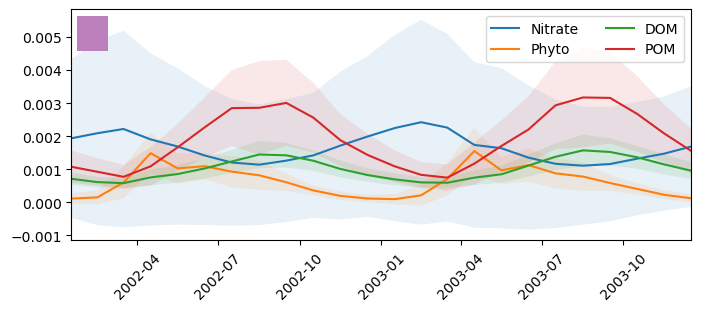

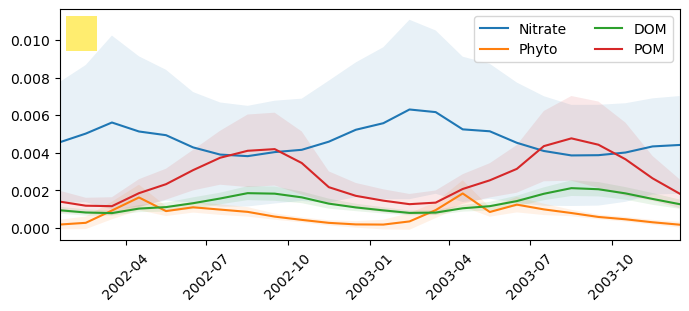

In [14]:
predict.plot_map()
predict.plot_ts()

Plot time series with rescaled values

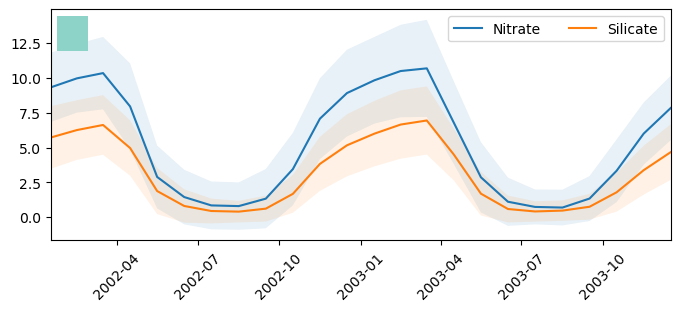

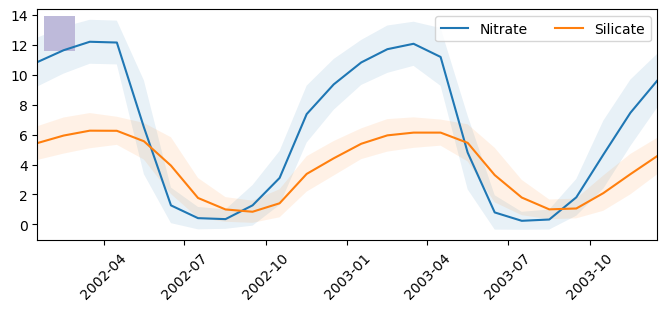

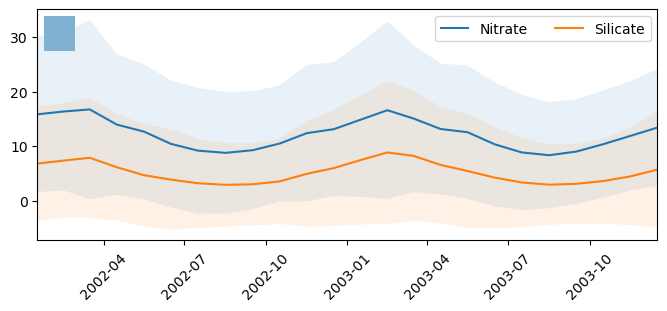

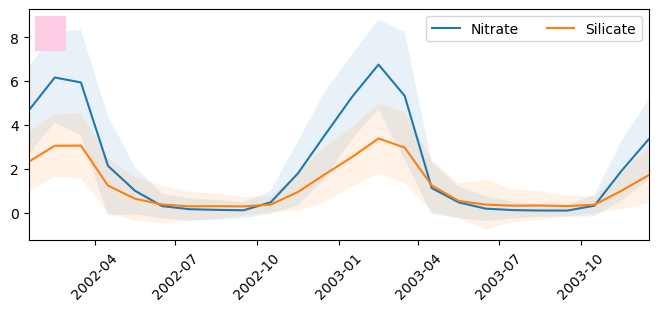

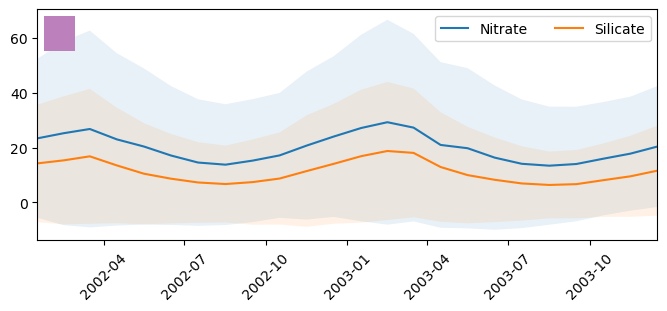

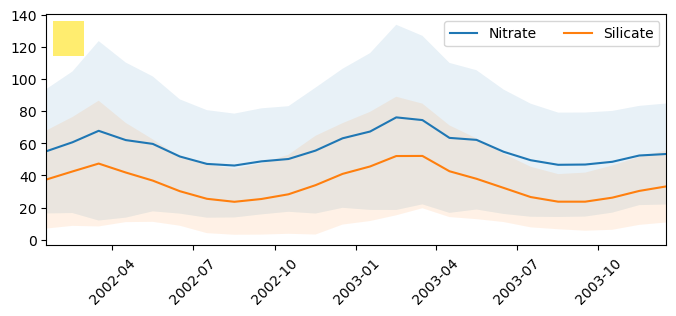

In [21]:
plot_vars = {'N3_n':'Nitrate','N5_s':'Silicate'}
predict.plot_ts(plot_vars=plot_vars,rescale=True)